In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Diferentes dataframes para trabajar



In [ ]:
#df = pd.read_csv("/content/drive/My Drive/DS4AProject/cleanDB_Small.csv") #dataset limpio y pequeño sin aleatoriedad

In [ ]:
#df = pd.read_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL.csv") #dataset limpio y completo. Shape = (7895343, 52)

In [ ]:
#dataset limpio, completo y con la columna de "DS_ORIG". Donde 1.0 = nacido, 2.0 = fetal, 3.0 = defun. Shape = (7895343, 52)
#df = pd.read_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,15,27,28,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Muestra aleatora del 20% del dataset limpio, completo y con la columna de "DS_ORIG". Donde 1.0 = nacido, 2.0 = fetal, 3.0 = defun. Shape = (1579068, 54)
#df = pd.read_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin_RandomSample.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Muestra aleatora del 20% del dataset limpio, completo, con las columnas de las variables categoricas con valores numericos y con la columna de "DS_ORIG".
#Donde 1.0 = nacido, 2.0 = fetal, 3.0 = defun. Shape = (1579068, 65)
df = pd.read_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin_RandomSample_NumCat.csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,APGAR1,APGAR2,AREA,AREA_RESIDENCIA_HAB,ASIS_MED,CERT_EXPEDIDO_POR,CODOCUR,COD_DPTO,COD_INST,DEPTO_RESIDENCIA,EDAD_MADRE,EDAD_PADRE,ESTADO_CIVIL_M,FECHA_NAC_HIJO_VIVO,FILE_YEAR,GRU_ED1,IDFACTORRH,IDHEMOCLAS,IDPERTET,IDPUEBLOIN,MANERA_MUERTE,MOMENTO_MUERTE,NACIDO_VIVO,NIV_EDUCATIVO_M,NIV_EDUCATIVO_P,NOMBRE_ADM_SALUD,NOM_INST,NUMERO_EMBARAZOS,NUM_CONSUL,N_HIJOSM,N_HIJOSV,ORIGINAL_FILE,PAIS_RESIDENCIA,PARTO_ATENDIDO_POR,PESO,PROFESION_QUIEN_CERTIFICA,RESULTADO_EMB,SEG_SOCIAL,SEXO,SITIO_EVENTO,TALLA,TIEMPO_GESTACION,TIPO_ADM_SALUD,TIPO_EMBARAZO,TIPO_PARTO,ULT_GRADO_MADRE,ULT_GRADO_PADRE,ID_BIRTH,ID_RESID,ID_VIOL,DATE,DS_ORIG,CERT_EXP_POR_CAT,MANERA_MUERTE_CAT,MOMENTO_MUERTE_CAT,PARTO_ATENDIDO_POR_CAT,PROFESION_QUIEN_CERTIFICA_CAT,SEG_SOCIAL_CAT,SEXO_CAT,SITIO_EVENTO_CAT,TIEMPO_GESTACION_CAT,TIPO_PARTO_CAT,TIPO_EMBARAZO_CAT,NACIDO_VIVO_INV
0,0,0,9.0,10.0,1,1.0,9.0,9,NaN,76,NaN,76,3.0,24.0,1.0,10/05/2014,2018,NaN,1.0,3.0,9.0,5.0,SIN_INFORMACION,SIN_INFORMACION,1,SECUNDARIA,SIN_INFORMACION,NaN,NaN,2.0,5.0,0.0,2.0,../Data/newData/nac/nac2018.txt,170.0,MEDICO,5.0,MEDICO,NACIDO_VIVO,SUBSIDIADO,FEMENINO,INSTITUCION_SALUD,5.0,38-41,2.0,SIMPLE,ESPONTANEO,9,99.0,76001,76001,1999,2018-07-01,1.0,9,9,9,1,1,3,1,1,4,1,1,0
1,1,1,8.0,9.0,1,1.0,9.0,9,NaN,8,8.00104e+10,8,2.0,19.0,1.0,NaN,2016,NaN,1.0,3.0,9.0,6.0,SIN_INFORMACION,SIN_INFORMACION,1,SECUNDARIA,SECUNDARIA,COOSALUD E.S.S. - ARS COOPERATIVA EMPRESA SOL...,IPS UNIVERSITARIA SEDE CAMINO EL BOSQUE DE MARIA,1.0,4.0,0.0,1.0,../Data/newData/nac/nac2016.txt,170.0,MEDICO,7.0,MEDICO,NACIDO_VIVO,SUBSIDIADO,FEMENINO,INSTITUCION_SALUD,5.0,38-41,2.0,SIMPLE,ESPONTANEO,10,11.0,8001,8001,1999,2016-07-01,1.0,9,9,9,1,1,3,1,1,4,1,1,0
2,2,2,8.0,9.0,1,1.0,9.0,9,NaN,8,8.758e+10,8,2.0,22.0,2.0,1900-01-01,2014,NaN,1.0,2.0,9.0,6.0,SIN_INFORMACION,SIN_INFORMACION,1,SECUNDARIA,SECUNDARIA,COMFACOR - CAJA DE COMPENSACION FAMILIAR DE CO...,CLINICA PORVENIR,1.0,5.0,0.0,1.0,../Data/newData/nac/nac2014.txt,170.0,MEDICO,6.0,MEDICO,NACIDO_VIVO,SUBSIDIADO,MASCULINO,INSTITUCION_SALUD,5.0,38-41,2.0,SIMPLE,CESAREA,11,7.0,8758,8758,1999,2014-09-01,1.0,9,9,9,1,1,3,2,1,4,2,1,0
3,3,3,8.0,9.0,1,1.0,9.0,9,NaN,11,1.10011e+11,11,2.0,19.0,1.0,1900-01-01,2014,NaN,1.0,3.0,9.0,6.0,SIN_INFORMACION,SIN_INFORMACION,1,SECUNDARIA,SECUNDARIA,CRUZ BLANCA EPS S.A.,CLINICA DEL OCCIDENTE S.A.,1.0,10.0,0.0,1.0,../Data/newData/nac/nac2014.txt,170.0,MEDICO,6.0,MEDICO,NACIDO_VIVO,CONTRIBUTIVO,FEMENINO,INSTITUCION_SALUD,5.0,38-41,1.0,SIMPLE,ESPONTANEO,11,11.0,11001,11001,1999,2014-08-01,1.0,9,9,9,1,1,1,1,1,4,1,1,0
4,4,4,9.0,9.0,1,1.0,9.0,9,NaN,47,4.7189e+11,47,2.0,21.0,2.0,2006-06-06,2009,NaN,1.0,4.0,9.0,6.0,SIN_INFORMACION,SIN_INFORMACION,1,SECUNDARIA,SECUNDARIA,NaN,HOSPITAL SAN CRISTOBAL,2.0,3.0,0.0,2.0,../Data/newData/nac/nac2009.txt,170.0,MEDICO,7.0,ENFERMERA,NACIDO_VIVO,NO_ASEGURADO,FEMENINO,INSTITUCION_SALUD,5.0,38-41,9.0,SIMPLE,ESPONTANEO,6,11.0,47189,47189,1999,2009-03-01,1.0,9,9,9,1,2,2,1,1,4,1,1,0


In [ ]:
df.shape

(1579068, 66)

In [ ]:
print("Porcentaje de vivos en el df",(df[df["DS_ORIG"] == 1].shape[0]/df.shape[0])*100)
print("Porcentaje de fetales en el df",(df[df["DS_ORIG"] == 2].shape[0]/df.shape[0])*100)
print("Porcentaje de defun en el df",(df[df["DS_ORIG"] == 3].shape[0]/df.shape[0])*100)

Porcentaje de vivos en el df 93.10903646961373
Porcentaje de fetales en el df 5.760423236998027
Porcentaje de defun en el df 1.1305402933882518


**************************************************************************************

#Agregando la variable (Columna) para conocer si el dataset original es nacido, fetal o defuncion.  nacido = 1, fetal = 2, defun = 3

In [ ]:
#df["ORIGINAL_FILE"].unique()

In [ ]:
#Agregando la columna
#dfDsOrigin = df.copy()

#dfDsOrigin.loc[df['ORIGINAL_FILE'].str.find("nac")>-1, 'DS_ORIG'] = 1.0  
#dfDsOrigin.loc[df['ORIGINAL_FILE'].str.find("fetal")>-1, 'DS_ORIG'] = 2.0  
#dfDsOrigin.loc[df['ORIGINAL_FILE'].str.find("defun")>-1, 'DS_ORIG'] = 3.0  

#print(dfDsOrigin["DS_ORIG"].unique())

[1. 2. 3.]


In [ ]:
#dfDsOrigin.shape

(7895343, 53)

In [ ]:
#dfDsOrigin.tail()

In [ ]:
#Almacenando este dataframe para no volver a hacer el procedimiento cada vez
#dfDsOrigin.to_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin.csv")

*******************************************************************************

#Dividiendo el dataframe para trabajar con el 20%

Este no es para train y test. Esta division se hace despues, simplemente es para no trabajar con los 7 millones de datos. Se hace de manera aleatoria y con una semilla establecida en 40 para su posterior repetibilidad.


In [ ]:
#train_df, test_df = train_test_split(df, train_size=0.2, shuffle = True, random_state=40)

In [ ]:
#train_df.shape

In [ ]:
#train_df

Encontrando el porcentaje de cada categoria de dataset original para asegurar que tenemos suficiente representación de nacidos, fetales y defun

In [ ]:
#train_df.shape

In [ ]:
#Asegurandeonos que la representacion de cada variable se conserve
#print("Porcentaje de vivos en el df",(train_df[train_df["DS_ORIG"] == 1].shape[0]/train_df.shape[0])*100)
#print("Porcentaje de fetales en el df",(train_df[train_df["DS_ORIG"] == 2].shape[0]/train_df.shape[0])*100)
#print("Porcentaje de defun en el df",(train_df[train_df["DS_ORIG"] == 3].shape[0]/train_df.shape[0])*100)

In [ ]:
#["DS_ORIG"].unique()

In [ ]:
#Almacenando este dataframe para posteriormente llamarlo y no tener que volver a realizar el procedimiento
#train_df.to_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin_RandomSample.csv")

********************************************************************************

#Convirtiendo las variables categoricas de texto a categorias numericas

In [ ]:
#df['CERT_EXPEDIDO_POR'].unique()

In [ ]:
#CERT_EXP_POR_CAT_dict = {
#    "9" : 9, "MEDICO_NO_TRATANTE":1 , "MEDICO_TRATANTE":2 ,
#    "MEDICO_LEGISTA": 3 , "PERSONAL_AUTORIZADO" : 4, 9:9}

#df_new = df[df['CERT_EXPEDIDO_POR'].isin(CERT_EXP_POR_CAT_dict.keys())].copy()


#df_new['CERT_EXP_POR_CAT'] = df_new['CERT_EXPEDIDO_POR'].apply(lambda x: CERT_EXP_POR_CAT_dict[x])
#print(df_new['CERT_EXP_POR_CAT'].unique()) 
#print(df_new.shape)

#df_new.head()

In [ ]:
#df_new["MANERA_MUERTE"].unique()

In [ ]:
#MANERA_MUERTE_dict = {
#    "SIN_INFORMACION" : 9, "NATURAL":1 , "VIOLENTA":2 ,
#    "EN_ESTUDIO": 3 }

#df_new['MANERA_MUERTE_CAT'] = df_new['MANERA_MUERTE'].apply(lambda x: MANERA_MUERTE_dict[x])
#print(df_new['MANERA_MUERTE_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()

In [ ]:
#df_new['MOMENTO_MUERTE'].unique()

array(['SIN_INFORMACION', 'ANTES', 'DESPUES', 'IGNORADO', 'DURANTE'],
      dtype=object)

In [ ]:
#MOMENTO_MUERTE_dict = {
#    "SIN_INFORMACION" : 9, "ANTES":1 , "DURANTE":2 ,
#    "IGNORADO": 3, 'DESPUES':4 }

#df_new['MOMENTO_MUERTE_CAT'] = df_new['MOMENTO_MUERTE'].apply(lambda x: MOMENTO_MUERTE_dict[x])
#print(df_new['MOMENTO_MUERTE_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['PARTO_ATENDIDO_POR'].unique()

array(['MEDICO', 'SIN_INFORMACION', 'OTRO', 'PARTERA', 'PROMOTOR_SALUD',
       'ENFERMERA', 'AUXILIAR_ENFERMERIA'], dtype=object)

In [ ]:
#PARTO_ATENDIDO_POR_dict = {
#    "SIN_INFORMACION" : 9, "MEDICO":1 , "ENFERMERA":2 ,
#    "AUXILIAR_ENFERMERIA": 3, 'PARTERA':4, 'PROMOTOR_SALUD':5, 'OTRO':6 }

#df_new['PARTO_ATENDIDO_POR_CAT'] = df_new['PARTO_ATENDIDO_POR'].apply(lambda x: PARTO_ATENDIDO_POR_dict[x])
#print(df_new['PARTO_ATENDIDO_POR_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['PROFESION_QUIEN_CERTIFICA'].unique()

In [ ]:
#PROFESION_QUIEN_CERTIFICA_dict = {"SIN_INFORMACION" : 9, "MEDICO":1 , "ENFERMERA":2 ,
#    "AUXILIAR_ENFERMERIA": 3, 'FUNCIONARIO_REG_CIVIL':4, 'PROMOTOR_SALUD':5, 'MEDICO_LEGISTA':6 }

#df_new['PROFESION_QUIEN_CERTIFICA_CAT'] = df_new['PROFESION_QUIEN_CERTIFICA'].apply(lambda x: PROFESION_QUIEN_CERTIFICA_dict[x])
#print(df_new['PROFESION_QUIEN_CERTIFICA_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['SEG_SOCIAL'].unique()

In [ ]:
#SEG_SOCIAL_dict = {"SIN_INFORMACION" : 9, "CONTRIBUTIVO":1 , "NO_ASEGURADO":2 ,
#    "SUBSIDIADO": 3, 'EXCEPCION':4, 'ESPECIAL':5}


#df_new['SEG_SOCIAL_CAT'] = df_new['SEG_SOCIAL'].apply(lambda x: SEG_SOCIAL_dict[x])
#print(df_new['SEG_SOCIAL_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['SEXO'].unique()

array(['FEMENINO', 'MASCULINO', 'INDETERMINADO', '9'], dtype=object)

In [ ]:
#SEXO_dict = {'9' : 9, "FEMENINO":1 , "MASCULINO":2 ,
#    "INDETERMINADO": 3}

#df_new['SEXO_CAT'] = df_new['SEXO'].apply(lambda x: SEXO_dict[x])
#print(df_new['SEXO_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['SITIO_EVENTO'].unique()

'2' = Centro puesto de salud. 

In [ ]:
#SITIO_EVENTO_dict = {'SIN_INFORMACION' : 9, "INSTITUCION_SALUD":1 , "2":2 ,
#    "CASA": 3, "VIA_PUBLICA": 4, "OTRO": 5, "TRABAJO": 6 }
#2 = Centro puesto de salud 

#df_new['SITIO_EVENTO_CAT'] = df_new['SITIO_EVENTO'].apply(lambda x: SITIO_EVENTO_dict[x])
#print(df_new['SITIO_EVENTO_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['TIEMPO_GESTACION'].unique()

In [ ]:
#print(df_new[df_new['TIEMPO_GESTACION'] == '0'])

In [ ]:
#TIEMPO_GESTACION_dict = {'SIN_INFORMACION' : 9, "0-22":1 , "22-27":2 ,
#    "28-37": 3,"38-41": 4, "42-MAS": 5, "IGNORADO": 9, '0':9}

#df_new['TIEMPO_GESTACION_CAT'] = df_new['TIEMPO_GESTACION'].apply(lambda x: TIEMPO_GESTACION_dict[x])
#print(df_new['TIEMPO_GESTACION_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['TIPO_PARTO'].unique()

In [ ]:
#TIPO_PARTO_dict = {'SIN_INFORMACION' : 9, "ESPONTANEO":1 , "CESAREA":2 ,
#    "INSTRUMENTADO": 3, 'IGNORADO':9 }

#df_new['TIPO_PARTO_CAT'] = df_new['TIPO_PARTO'].apply(lambda x: TIPO_PARTO_dict[x])
#print(df_new['TIPO_PARTO_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#df_new['TIPO_EMBARAZO'].unique()

In [ ]:
#TIPO_EMBARAZO_dict = {'9' : 9, "SIMPLE":1 , "DOBLE":2 ,
#    "TRIPLE": 3,"CUADRUPLE_MAs": 4, 'IGNORADO':9 }


#df_new['TIPO_EMBARAZO_CAT'] = df_new['TIPO_EMBARAZO'].apply(lambda x: TIPO_EMBARAZO_dict[x])
#print(df_new['TIPO_EMBARAZO_CAT'].unique()) 
#print(df_new.shape)
#df_new.head()



In [ ]:
#print(df_new['NACIDO_VIVO'].unique())

In [ ]:
#output_y_dic = {1:0, 0:1}
#Modelando los muertos, en esta variable invertida (NACIDO_VIVO_INV)

#df_new = df_cat_num_models[df4_full['NACIDO_VIVO'].isin(output_y_dic.keys())].copy()

#df_new['NACIDO_VIVO_INV'] = df_new['NACIDO_VIVO'].apply(lambda x: output_y_dic[x])
#print(df_new['NACIDO_VIVO_INV'].unique()) 
#print(df_new.shape)
#df_new.tail()

In [ ]:
#Almacenando este dataframe para no volver a hacer el procedimiento cada vez
#df_new.to_csv("/content/drive/My Drive/DS4AProject/CleanDB_FULL_DsOrigin_RandomSample_NumCat.csv")

#Matriz de correlación

                  NUMERO_EMBARAZOS  NUM_CONSUL  ...      PESO     TALLA
NUMERO_EMBARAZOS          1.000000    0.287301  ... -0.006956  0.280479
NUM_CONSUL                0.287301    1.000000  ... -0.184426  0.815134
EDAD_MADRE                0.329918    0.114829  ...  0.043834  0.105460
EDAD_PADRE                0.291065    0.863559  ... -0.225889  0.851595
N_HIJOSM                  0.717851    0.230508  ... -0.013590  0.227176
N_HIJOSV                  0.735193    0.188348  ...  0.002408  0.181812
PESO                     -0.006956   -0.184426  ...  1.000000 -0.018372
TALLA                     0.280479    0.815134  ... -0.018372  1.000000

[8 rows x 8 columns]


Text(0.5, 1.0, 'Correlations between variables')

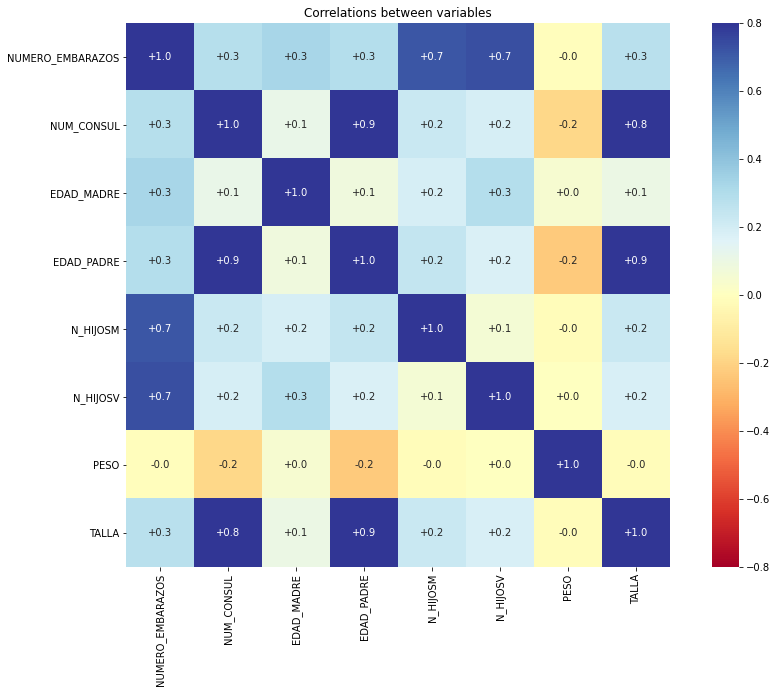

In [ ]:
data_full = [ df["NUMERO_EMBARAZOS"].astype(float), df["NUM_CONSUL"].astype(float),df['EDAD_MADRE'].astype(float),
        df['EDAD_PADRE'].astype(float),
         df['N_HIJOSM'].astype(float),df["N_HIJOSV"].astype(float),df['PESO'].astype(float),
        df["TALLA"].astype(float)]

headers_full = ["NUMERO_EMBARAZOS","NUM_CONSUL",'EDAD_MADRE','EDAD_PADRE','N_HIJOSM',"N_HIJOSV",'PESO',"TALLA"]
df3_full = pd.concat(data_full, axis=1, keys=headers_full)
print(df3_full.corr(method="pearson")) 

plt.figure(figsize=(15,10))
sns.heatmap(df3_full.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlations between variables")

#MODELOS

Modelos con todas las variables categoricas numericas



1.   Modelo con datos de los 3 dataset originales 



In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'APGAR1', 'APGAR2', 'AREA',
       'AREA_RESIDENCIA_HAB', 'ASIS_MED', 'CERT_EXPEDIDO_POR', 'CODOCUR',
       'COD_DPTO', 'COD_INST', 'DEPTO_RESIDENCIA', 'EDAD_MADRE', 'EDAD_PADRE',
       'ESTADO_CIVIL_M', 'FECHA_NAC_HIJO_VIVO', 'FILE_YEAR', 'GRU_ED1',
       'IDFACTORRH', 'IDHEMOCLAS', 'IDPERTET', 'IDPUEBLOIN', 'MANERA_MUERTE',
       'MOMENTO_MUERTE', 'NACIDO_VIVO', 'NIV_EDUCATIVO_M', 'NIV_EDUCATIVO_P',
       'NOMBRE_ADM_SALUD', 'NOM_INST', 'NUMERO_EMBARAZOS', 'NUM_CONSUL',
       'N_HIJOSM', 'N_HIJOSV', 'ORIGINAL_FILE', 'PAIS_RESIDENCIA',
       'PARTO_ATENDIDO_POR', 'PESO', 'PROFESION_QUIEN_CERTIFICA',
       'RESULTADO_EMB', 'SEG_SOCIAL', 'SEXO', 'SITIO_EVENTO', 'TALLA',
       'TIEMPO_GESTACION', 'TIPO_ADM_SALUD', 'TIPO_EMBARAZO', 'TIPO_PARTO',
       'ULT_GRADO_MADRE', 'ULT_GRADO_PADRE', 'ID_BIRTH', 'ID_RESID', 'ID_VIOL',
       'DATE', 'DS_ORIG', 'CERT_EXP_POR_CAT', 'MANERA_MUERTE_CAT',
       'MOMENTO_MUERTE_CAT', 'PARTO_ATENDIDO_POR_CAT',

In [ ]:
df_new = df.copy()
data_cat_num= [ df_new["APGAR1"].astype(float), df_new["APGAR2"].astype(float), df_new["NACIDO_VIVO"].astype(float), df_new["TALLA"].astype(float),
               df_new["PESO"].astype(float),df_new["AREA"].astype('category'),
         df_new["AREA_RESIDENCIA_HAB"].astype(float),df_new["ASIS_MED"].astype(float),
         df_new["DEPTO_RESIDENCIA"].astype(float),df_new["EDAD_MADRE"].astype(float),
        df_new["EDAD_PADRE"].astype(float),df_new["ESTADO_CIVIL_M"].astype(float),df_new["IDFACTORRH"].astype(float),
        df_new["IDHEMOCLAS"].astype(float),df_new["IDPERTET"].astype(float),df_new["IDPUEBLOIN"].astype(float)
        ,df_new["NUMERO_EMBARAZOS"].astype(float),df_new["NUM_CONSUL"].astype(float),df_new["N_HIJOSM"].astype(float),
        df_new["N_HIJOSV"].astype(float),df_new["TIPO_ADM_SALUD"].astype(float),df_new["SEXO_CAT"].astype('category'),df_new["NACIDO_VIVO_INV"].astype(float), 
        df_new["CERT_EXP_POR_CAT"].astype('category'),df_new["MANERA_MUERTE_CAT"].astype('category'),df_new["MOMENTO_MUERTE_CAT"].astype('category'),
        df_new["PARTO_ATENDIDO_POR_CAT"].astype('category'), df_new["PROFESION_QUIEN_CERTIFICA_CAT"].astype('category'), 
        df_new["SEG_SOCIAL_CAT"].astype('category'),df_new["SITIO_EVENTO_CAT"].astype('category'),df_new["TIEMPO_GESTACION_CAT"].astype('category')
        ,df_new["TIPO_PARTO_CAT"].astype('category'),df_new["TIPO_EMBARAZO_CAT"].astype('category')]
headers_cat_num= ["APGAR1","APGAR2","NACIDO_VIVO","TALLA","PESO","AREA",
            "AREA_RESIDENCIA_HAB","ASIS_MED", "DEPTO_RESIDENCIA",
           "EDAD_MADRE","EDAD_PADRE","ESTADO_CIVIL_M"
           ,"IDFACTORRH","IDHEMOCLAS","IDPERTET","IDPUEBLOIN",
           "NUMERO_EMBARAZOS","NUM_CONSUL","N_HIJOSM","N_HIJOSV","TIPO_ADM_SALUD","SEXO_CAT","NACIDO_VIVO_INV","CERT_EXP_POR_CAT", "MANERA_MUERTE_CAT",
           "MOMENTO_MUERTE_CAT", "PARTO_ATENDIDO_POR_CAT","PROFESION_QUIEN_CERTIFICA_CAT","SEG_SOCIAL_CAT","SITIO_EVENTO_CAT","TIEMPO_GESTACION_CAT","TIPO_PARTO_CAT" ,
           "TIPO_EMBARAZO_CAT"]
df_cat_num_models= pd.concat(data_cat_num, axis=1, keys=headers_cat_num)
print(df_cat_num_models.shape)
df_cat_num_models.head()

(1579068, 33)


,APGAR1,APGAR2,NACIDO_VIVO,TALLA,PESO,AREA,AREA_RESIDENCIA_HAB,ASIS_MED,DEPTO_RESIDENCIA,EDAD_MADRE,EDAD_PADRE,ESTADO_CIVIL_M,IDFACTORRH,IDHEMOCLAS,IDPERTET,IDPUEBLOIN,NUMERO_EMBARAZOS,NUM_CONSUL,N_HIJOSM,N_HIJOSV,TIPO_ADM_SALUD,SEXO_CAT,NACIDO_VIVO_INV,CERT_EXP_POR_CAT,MANERA_MUERTE_CAT,MOMENTO_MUERTE_CAT,PARTO_ATENDIDO_POR_CAT,PROFESION_QUIEN_CERTIFICA_CAT,SEG_SOCIAL_CAT,SITIO_EVENTO_CAT,TIEMPO_GESTACION_CAT,TIPO_PARTO_CAT,TIPO_EMBARAZO_CAT
0,9.0,10.0,1.0,5.0,5.0,1,1.0,9.0,76.0,3.0,24.0,1.0,1.0,3.0,9.0,5.0,2.0,5.0,0.0,2.0,2.0,1,0.0,9,9,9,1,1,3,1,4,1,1
1,8.0,9.0,1.0,5.0,7.0,1,1.0,9.0,8.0,2.0,19.0,1.0,1.0,3.0,9.0,6.0,1.0,4.0,0.0,1.0,2.0,1,0.0,9,9,9,1,1,3,1,4,1,1
2,8.0,9.0,1.0,5.0,6.0,1,1.0,9.0,8.0,2.0,22.0,2.0,1.0,2.0,9.0,6.0,1.0,5.0,0.0,1.0,2.0,2,0.0,9,9,9,1,1,3,1,4,2,1
3,8.0,9.0,1.0,5.0,6.0,1,1.0,9.0,11.0,2.0,19.0,1.0,1.0,3.0,9.0,6.0,1.0,10.0,0.0,1.0,1.0,1,0.0,9,9,9,1,1,1,1,4,1,1
4,9.0,9.0,1.0,5.0,7.0,1,1.0,9.0,47.0,2.0,21.0,2.0,1.0,4.0,9.0,6.0,2.0,3.0,0.0,2.0,9.0,1,0.0,9,9,9,1,2,2,1,4,1,1


Modelo con todas las variables categoricas 

In [ ]:
FORMULA="NACIDO_VIVO_INV~NUMERO_EMBARAZOS+PESO+EDAD_MADRE+SEXO_CAT+CERT_EXP_POR_CAT+MANERA_MUERTE_CAT+MOMENTO_MUERTE_CAT+PARTO_ATENDIDO_POR_CAT+PROFESION_QUIEN_CERTIFICA_CAT+SEG_SOCIAL_CAT+SITIO_EVENTO_CAT+TIEMPO_GESTACION_CAT+TIPO_PARTO_CAT+TIPO_EMBARAZO_CAT"
modelo_full_output=smf.ols(FORMULA, data=df_cat_num_models).fit()
print(modelo_full_output.summary())
print(modelo_full_output.aic)

                            OLS Regression Results                            
Dep. Variable:        NACIDO_VIVO_INV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.873e+31
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:56:08   Log-Likelihood:             4.8631e+07
No. Observations:             1579068   AIC:                        -9.726e+07
Df Residuals:                 1579015   BIC:                        -9.726e+07
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Retiradas: \\
1.PARTO_ATENDIDO_POR_CAT \\
2.PROFESION_QUIEN_CERTIFICA_CAT \\ 
3.MANERA_MUERTE_CAT y MOMENTO_MUERTE_CAT -> Solo información para los muertos  \\
4.+EDAD_MADRE \\
5.TIPO_EMBARAZO_CAT ---> no esta rechazada del todo. Se debe recategorizar



In [ ]:
FORMULA="NACIDO_VIVO_INV~NUMERO_EMBARAZOS+PESO+SEXO_CAT+CERT_EXP_POR_CAT+SEG_SOCIAL_CAT+SITIO_EVENTO_CAT+TIEMPO_GESTACION_CAT+TIPO_PARTO_CAT"
modelo_full_output=smf.ols(FORMULA, data=df_cat_num_models).fit()
print(modelo_full_output.summary())
print(modelo_full_output.aic)

                            OLS Regression Results                            
Dep. Variable:        NACIDO_VIVO_INV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.928e+31
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:56:16   Log-Likelihood:             4.9459e+07
No. Observations:             1579068   AIC:                        -9.892e+07
Df Residuals:                 1579039   BIC:                        -9.892e+07
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Retirada: \\
CERT_EXP_POR_CAT

In [ ]:
#Este es el modelo con el que se está trabajando actualmente
FORMULA="NACIDO_VIVO_INV~NUMERO_EMBARAZOS+PESO+SEXO_CAT+SEG_SOCIAL_CAT+SITIO_EVENTO_CAT+TIEMPO_GESTACION_CAT+TIPO_PARTO_CAT+AREA"
modelo_full_output=smf.ols(FORMULA, data=df_cat_num_models).fit()
print(modelo_full_output.summary())
print(modelo_full_output.aic)

                            OLS Regression Results                            
Dep. Variable:        NACIDO_VIVO_INV   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.976e+05
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:56:27   Log-Likelihood:             1.0938e+06
No. Observations:             1579068   AIC:                        -2.188e+06
Df Residuals:                 1579040   BIC:                        -2.187e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

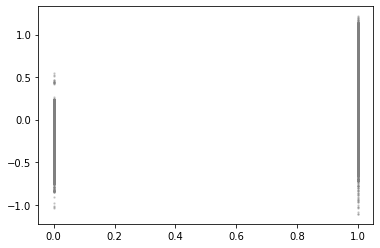

In [ ]:
df_cat_num_models["residuos"]=modelo_full_output.resid
cost = df_cat_num_models["NACIDO_VIVO_INV"]
plt.scatter(cost, df_cat_num_models["residuos"], s=2, alpha=0.3, color="grey")

#1.1 Modelo unicamente para vivos y fetales

In [ ]:
df_v_f = df[df["DS_ORIG"]==1]
df_v_f.shape

(1470255, 66)

In [ ]:
#df_v_f = df[df["DS_ORIG"]==1]

data_cat_= [ df_new["APGAR1"].astype(float), df_new["APGAR2"].astype(float), df_new["NACIDO_VIVO"].astype(float), df_new["TALLA"].astype(float),
               df_new["PESO"].astype(float),df_new["AREA"].astype('category'),
         df_new["AREA_RESIDENCIA_HAB"].astype(float),df_new["ASIS_MED"].astype(float),
         df_new["DEPTO_RESIDENCIA"].astype(float),df_new["EDAD_MADRE"].astype(float),
        df_new["EDAD_PADRE"].astype(float),df_new["ESTADO_CIVIL_M"].astype(float),df_new["IDFACTORRH"].astype(float),
        df_new["IDHEMOCLAS"].astype(float),df_new["IDPERTET"].astype(float),df_new["IDPUEBLOIN"].astype(float)
        ,df_new["NUMERO_EMBARAZOS"].astype(float),df_new["NUM_CONSUL"].astype(float),df_new["N_HIJOSM"].astype(float),
        df_new["N_HIJOSV"].astype(float),df_new["TIPO_ADM_SALUD"].astype(float),df_new["SEXO_CAT"].astype('category'),df_new["NACIDO_VIVO_INV"].astype(float), 
        df_new["CERT_EXP_POR_CAT"].astype('category'),df_new["MANERA_MUERTE_CAT"].astype('category'),df_new["MOMENTO_MUERTE_CAT"].astype('category'),
        df_new["PARTO_ATENDIDO_POR_CAT"].astype('category'), df_new["PROFESION_QUIEN_CERTIFICA_CAT"].astype('category'), 
        df_new["SEG_SOCIAL_CAT"].astype('category'),df_new["SITIO_EVENTO_CAT"].astype('category'),df_new["TIEMPO_GESTACION_CAT"].astype('category')
        ,df_new["TIPO_PARTO_CAT"].astype('category'),df_new["TIPO_EMBARAZO_CAT"].astype('category')]
headers_cat_num= ["APGAR1","APGAR2","NACIDO_VIVO","TALLA","PESO","AREA",
            "AREA_RESIDENCIA_HAB","ASIS_MED", "DEPTO_RESIDENCIA",
           "EDAD_MADRE","EDAD_PADRE","ESTADO_CIVIL_M"
           ,"IDFACTORRH","IDHEMOCLAS","IDPERTET","IDPUEBLOIN",
           "NUMERO_EMBARAZOS","NUM_CONSUL","N_HIJOSM","N_HIJOSV","TIPO_ADM_SALUD","SEXO_CAT","NACIDO_VIVO_INV","CERT_EXP_POR_CAT", "MANERA_MUERTE_CAT",
           "MOMENTO_MUERTE_CAT", "PARTO_ATENDIDO_POR_CAT","PROFESION_QUIEN_CERTIFICA_CAT","SEG_SOCIAL_CAT","SITIO_EVENTO_CAT","TIEMPO_GESTACION_CAT","TIPO_PARTO_CAT" ,
           "TIPO_EMBARAZO_CAT"]
df_cat_num_models= pd.concat(data_cat_num, axis=1, keys=headers_cat_num)
print(df_cat_num_models.shape)
df_cat_num_models.head()

In [ ]:
#FORMULA="NACIDO_VIVO_INV~NUMERO_EMBARAZOS+PESO+EDAD_MADRE+SEXO_CAT+CERT_EXP_POR_CAT+MANERA_MUERTE_CAT+MOMENTO_MUERTE_CAT+PARTO_ATENDIDO_POR_CAT+PROFESION_QUIEN_CERTIFICA_CAT+SEG_SOCIAL_CAT+SITIO_EVENTO_CAT+TIEMPO_GESTACION_CAT+TIPO_PARTO_CAT+TIPO_EMBARAZO_CAT"
#modelo_cat=smf.ols(FORMULA, data=df_cat_num_models).fit()
#print(modelo_cat.summary())
#print(modelo_cat.aic)

#1.2 Modelos con las variables categoricas con valor de string iniciales

Nota: Se observa que muchas de estas variables sesgan el modelo al solo tener valores para algunos de los datasets originales. Por lo tanto NO SE CONCIDERAN LOS MODELOS MAS OPTIMOS Y SE DESCARTAN. Se encuentra aun en el notebook para visualización e información

In [ ]:
data2 = [ df["APGAR1"].astype(float), df["APGAR2"].astype(float), df["NACIDO_VIVO"].astype(float)
        , df["TALLA"].astype(float),df["PESO"].astype(float),df["AREA"].astype(float),
         df["AREA_RESIDENCIA_HAB"].astype(float),df["ASIS_MED"].astype(float),
         df["DEPTO_RESIDENCIA"].astype(float),df["EDAD_MADRE"].astype(float),
        df["EDAD_PADRE"].astype(float),df["ESTADO_CIVIL_M"].astype(float),df["IDFACTORRH"].astype(float),
        df["IDHEMOCLAS"].astype(float),df["IDPERTET"].astype(float),df["IDPUEBLOIN"].astype(float),
        df["NUMERO_EMBARAZOS"].astype(float),df["NUM_CONSUL"].astype(float),df["N_HIJOSM"].astype(float),
        df["N_HIJOSV"].astype(float),df["TIPO_ADM_SALUD"].astype(float),df["NACIDO_VIVO_INV"].astype(float)]
headers2 = ["APGAR1","APGAR2","NACIDO_VIVO","TALLA","PESO","AREA",
            "AREA_RESIDENCIA_HAB","ASIS_MED", "DEPTO_RESIDENCIA",
           "EDAD_MADRE","EDAD_PADRE","ESTADO_CIVIL_M"
           ,"IDFACTORRH","IDHEMOCLAS","IDPERTET","IDPUEBLOIN",
           "NUMERO_EMBARAZOS"
           ,"NUM_CONSUL","N_HIJOSM","N_HIJOSV","TIPO_ADM_SALUD","NACIDO_VIVO_INV"]
df4 = pd.concat(data2, axis=1, keys=headers2)
df4.head()

,APGAR1,APGAR2,NACIDO_VIVO,TALLA,PESO,AREA,AREA_RESIDENCIA_HAB,ASIS_MED,DEPTO_RESIDENCIA,EDAD_MADRE,EDAD_PADRE,ESTADO_CIVIL_M,IDFACTORRH,IDHEMOCLAS,IDPERTET,IDPUEBLOIN,NUMERO_EMBARAZOS,NUM_CONSUL,N_HIJOSM,N_HIJOSV,TIPO_ADM_SALUD,NACIDO_VIVO_INV
0,9.0,10.0,1.0,5.0,5.0,1.0,1.0,9.0,76.0,3.0,24.0,1.0,1.0,3.0,9.0,5.0,2.0,5.0,0.0,2.0,2.0,0.0
1,8.0,9.0,1.0,5.0,7.0,1.0,1.0,9.0,8.0,2.0,19.0,1.0,1.0,3.0,9.0,6.0,1.0,4.0,0.0,1.0,2.0,0.0
2,8.0,9.0,1.0,5.0,6.0,1.0,1.0,9.0,8.0,2.0,22.0,2.0,1.0,2.0,9.0,6.0,1.0,5.0,0.0,1.0,2.0,0.0
3,8.0,9.0,1.0,5.0,6.0,1.0,1.0,9.0,11.0,2.0,19.0,1.0,1.0,3.0,9.0,6.0,1.0,10.0,0.0,1.0,1.0,0.0
4,9.0,9.0,1.0,5.0,7.0,1.0,1.0,9.0,47.0,2.0,21.0,2.0,1.0,4.0,9.0,6.0,2.0,3.0,0.0,2.0,9.0,0.0


In [ ]:
FORMULA="NACIDO_VIVO~APGAR1+APGAR2+TALLA+PESO+AREA+AREA_RESIDENCIA_HAB+ASIS_MED+DEPTO_RESIDENCIA+EDAD_MADRE+EDAD_PADRE+ESTADO_CIVIL_M+IDFACTORRH+IDHEMOCLAS+IDPERTET+IDPUEBLOIN+NUMERO_EMBARAZOS+NUM_CONSUL+N_HIJOSM+N_HIJOSV+TIPO_ADM_SALUD"
modelo=smf.ols(FORMULA, data=df4).fit()
print(modelo.summary())
print(modelo.aic)

                            OLS Regression Results                            
Dep. Variable:            NACIDO_VIVO   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.074e+07
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:44:15   Log-Likelihood:             3.8125e+06
No. Observations:             1579068   AIC:                        -7.625e+06
Df Residuals:                 1579047   BIC:                        -7.625e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1134    

In [ ]:
FORMULA="NACIDO_VIVO~APGAR1+APGAR2+TALLA+PESO+AREA+AREA_RESIDENCIA_HAB+ASIS_MED+DEPTO_RESIDENCIA+EDAD_MADRE+EDAD_PADRE+ESTADO_CIVIL_M+IDFACTORRH+IDHEMOCLAS+IDPERTET+IDPUEBLOIN+NUM_CONSUL+TIPO_ADM_SALUD"
modelo2=smf.ols(FORMULA, data=df4).fit()
print(modelo2.summary())
print(modelo2.aic)

                            OLS Regression Results                            
Dep. Variable:            NACIDO_VIVO   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.237e+07
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:44:19   Log-Likelihood:             3.7958e+06
No. Observations:             1579068   AIC:                        -7.592e+06
Df Residuals:                 1579050   BIC:                        -7.591e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1082    

In [ ]:
FORMULA="NACIDO_VIVO_INV~NUMERO_EMBARAZOS+PESO+EDAD_MADRE"
modelo_full_output=smf.ols(FORMULA, data=df4).fit()
print(modelo_full_output.summary())
print(modelo_full_output.aic)

                            OLS Regression Results                            
Dep. Variable:        NACIDO_VIVO_INV   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 8.881e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:44:40   Log-Likelihood:                 50849.
No. Observations:             1579068   AIC:                        -1.017e+05
Df Residuals:                 1579064   BIC:                        -1.016e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2807      0.001  

In [ ]:
FORMULA="NACIDO_VIVO~EDAD_PADRE+NUMERO_EMBARAZOS+PESO"
modelo_full=smf.ols(FORMULA, data=df4).fit()
print(modelo_full.summary())
print(modelo_full.aic)

                            OLS Regression Results                            
Dep. Variable:            NACIDO_VIVO   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.349e+06
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:44:51   Log-Likelihood:             2.0638e+06
No. Observations:             1579068   AIC:                        -4.128e+06
Df Residuals:                 1579064   BIC:                        -4.128e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0093      0.000  

In [ ]:

FORMULA="NACIDO_VIVO~NUM_CONSUL+NUMERO_EMBARAZOS+PESO"
modelo_full=smf.ols(FORMULA, data=df4).fit()
print(modelo_full.summary())
print(modelo_full.aic)

                            OLS Regression Results                            
Dep. Variable:            NACIDO_VIVO   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 2.096e+06
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:45:03   Log-Likelihood:             1.1955e+06
No. Observations:             1579068   AIC:                        -2.391e+06
Df Residuals:                 1579064   BIC:                        -2.391e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9761      0.000  

In [ ]:
FORMULA="NACIDO_VIVO~APGAR1+APGAR2+TALLA+PESO"
modelo_full=smf.ols(FORMULA, data=df4).fit()
print(modelo_full.summary())
print(modelo_full.aic)

                            OLS Regression Results                            
Dep. Variable:            NACIDO_VIVO   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.862e+06
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:45:08   Log-Likelihood:             1.5937e+06
No. Observations:             1579068   AIC:                        -3.187e+06
Df Residuals:                 1579063   BIC:                        -3.187e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3073      0.000   2676.667      0.0